### This notebook heavily relies on `speculator`: https://github.com/justinalsing/speculator.

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import astropy.units as u
import kuaizi

In [7]:
kuaizi.set_matplotlib(style='nature', usetex=False)
kuaizi.set_env(project='popsed', name='', data_dir='/scratch/gpfs/jiaxuanl/Data')

'/scratch/gpfs/jiaxuanl/Data/popsed/'

In [8]:
import sys
sys.path.append('/home/jiaxuanl/Research/popsed/')
from popsed import mock
from popsed.speculator import SpectrumPCA
from scipy.stats import norm

In [9]:
pca = SpectrumPCA(9, 1600, 30, ['./train_sed/log_spec_train.npy'])

In [10]:
pca.scale_spectra()

In [11]:
pca.train_pca()

In [12]:
log_spec, log_spec_in_basis = pca.validate_pca_basis('./train_sed/log_spec_vali.npy')

In [13]:
diff = (10**log_spec - 10**log_spec_in_basis) / 10**log_spec * 100

Text(0.5, 0, 'Wavelength [nm]')

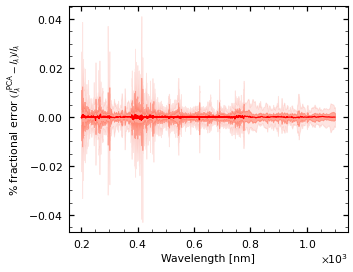

In [14]:
x = np.arange(2000, 11000, 2) / 10
plt.plot(x, np.median(diff, axis=0), color='r')
plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(1)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(1) * 100, axis=0), alpha=0.5, color='tomato')

plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(2)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(2) * 100, axis=0), alpha=0.2, color='salmon')

#plt.ylim(-0.008, 0.008)

plt.ylabel(r'% fractional error $(l_{\lambda}^{\mathrm{PCA}} - l_{\lambda})/l_{\lambda}$')
plt.xlabel('Wavelength [nm]')

## Re-train on all data

In [15]:
pca = SpectrumPCA(9, 1600, 30, ['./train_sed/log_spec_all.npy'])
pca.scale_spectra()
pca.train_pca()
pca.transform_and_stack_training_data(filename='./train_sed/pca', retain=True)

In [16]:
pca.save('./train_sed/pca_trained.pkl')

Text(0.5, 0.98, 'PCA components')

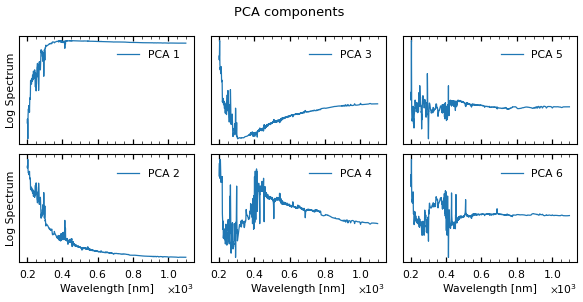

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(12, 5), sharex=True)

x = np.arange(2000, 11000, 2) / 10

for i in range(6):
    ax = axes[i % 2, i // 2]
    ax.plot(x, pca.PCA.components_[i], label=f'PCA {i + 1}')
    ax.set_yticks([])
    ax.legend(loc='upper right')

axes[0][0].set_ylabel('Log Spectrum')
axes[1][0].set_ylabel('Log Spectrum')

for k in range(3):
    axes[1][k].set_xlabel('Wavelength [nm]')
    
plt.suptitle('PCA components')

In [18]:
log_spec, log_spec_in_basis = pca.validate_pca_basis('./train_sed/log_spec_all.npy')
diff = (10**log_spec - 10**log_spec_in_basis) / 10**log_spec * 100

Text(0.5, 0, 'Wavelength [nm]')

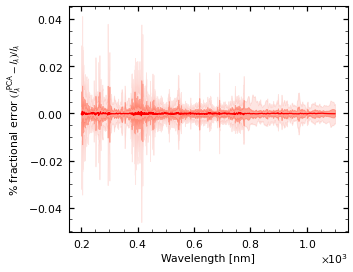

In [19]:
plt.plot(x, np.median(diff, axis=0), color='r')
plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(1)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(1) * 100, axis=0), alpha=0.5, color='tomato')

plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(2)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(2) * 100, axis=0), alpha=0.2, color='salmon')

#plt.ylim(-0.008, 0.008)

plt.ylabel(r'% fractional error $(l_{\lambda}^{\mathrm{PCA}} - l_{\lambda})/l_{\lambda}$')
plt.xlabel('Wavelength [nm]')